<a href="https://colab.research.google.com/github/tuomaseerola/emr/blob/master/Ch1_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1 

A Jupyter notebook with code examples in R for _Chapter 1_ of _Routlegde_ book titled **[How to Conduct Empirical Music Research](https://github.com/tuomaseerola/emr)** by [Tuomas Eerola](https://www.durham.ac.uk/staff/tuomas-eerola/), [Music and Science Lab]() at [Durham University](https://www.durham.ac.uk) and [Music and Science Lab](https://musicscience.net) scheduled to be published in 2023.

To run the code in your browser, open the file in Colab (click the icon "Open in Colab"). Alternatively, you can download the notebook and run it locally.

This notebook demonstrates how to bring your own csv data into the colab and use them in the analysis and how to save figures or tables within the colab.  

File `Ch1_examples.ipynb` | Version `11/9/2022` | [Back to Index](https://github.com/tuomaseerola/emr)

---

## Load libraries

In [2]:
library(ggplot2,quietly = TRUE)
library(tidyverse,quietly = TRUE)
#install.packages("cowplot", repos = "http://cran.us.r-project.org")
library(cowplot)

## Ch1_Ex01.R
This is the first figure. 

In [3]:
## DATA ------------------------------------------------
# From Huron 2001
IV <- c("P1","m2","M2","m3","M3","P4","TT","P5","m6","M6","m7","M7","P8")
Consonance <- c(60,5,20,76,93,74,47,70,73,80,30,12,60)/100
Frequency <- c(15,5,26,87,58,50,35,52,65,88,32,3,23)/100
df <- data.frame(IV,Consonance,Frequency)
df$Nro <- 1:13

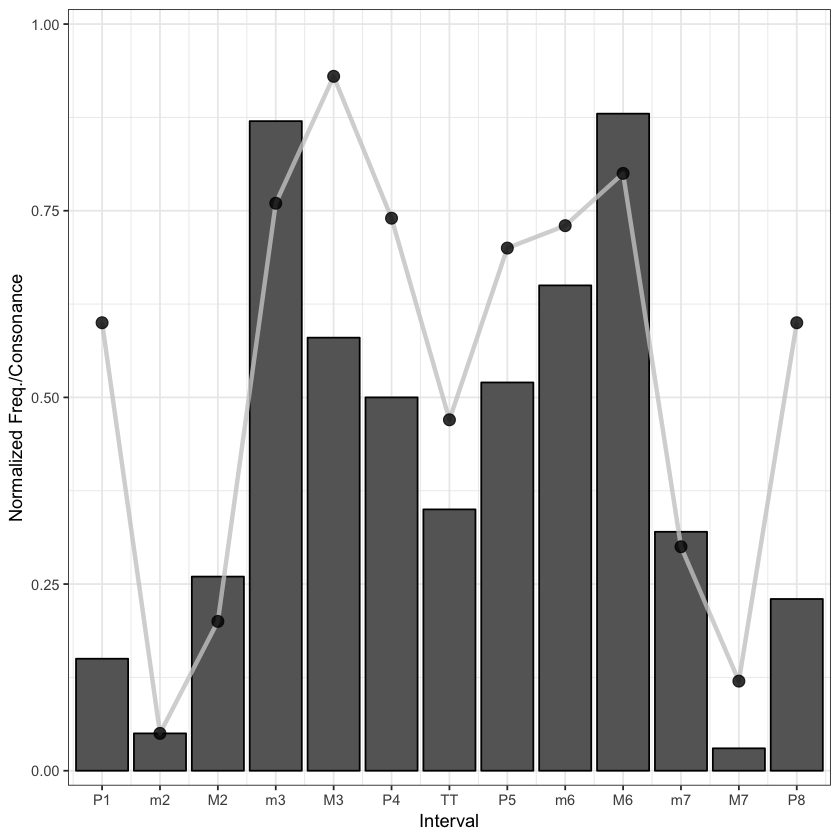

In [4]:
## PLOT ------------------------------------------------
g1 <- ggplot(df)  + 
  geom_bar(aes(x=Nro, y=Frequency),stat="identity", fill="gray40",colour='black')+
  geom_line(aes(x=Nro, y=Consonance),stat="identity", group=1,size=1.25,colour="gray80",alpha=0.80)+
  geom_point(aes(x=Nro, y=Consonance),stat="identity", group=1,size=3,alpha=0.80)+
  theme_bw()+
  xlab('Interval')+
  ylab('Normalized Freq./Consonance')+
  scale_x_continuous(breaks = seq(1,13,by=1),labels = IV,expand = c(0.01,0.01))+
  scale_y_continuous(breaks = seq(0,1,by=0.25),expand = c(0.01,0.01),limits = c(0,1))
print(g1)

## Ch1_Ex02.R (Correlations)
This is the example about correlations.


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Warning message:
“Removed 2 rows containing missing values (geom_smooth).”

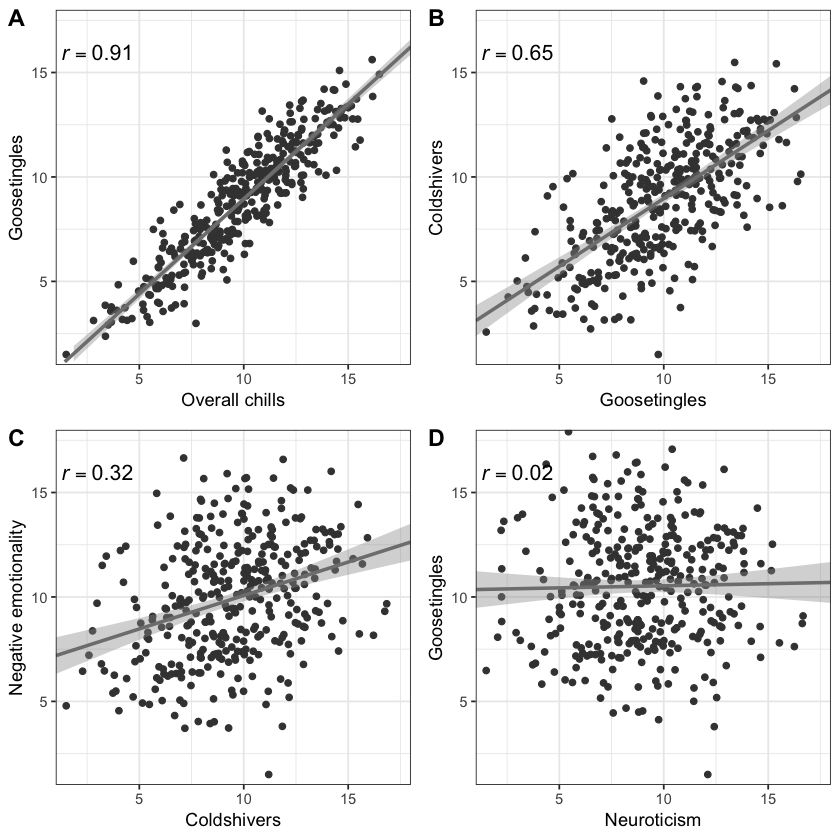

In [5]:
## DEFINTIONS ------------------------------------------------
library(ggplot2)
library(MASS)

set.seed(101)

# Desired correlation
d.cor <- 0.32
# Desired mean of X
d.mx <- 10
# Desired range of X
d.rangex <- 17
# Desired mean of Y
d.my <- 10
# Desired range of Y
d.rangey <- 17
# Calculations to create multipliation and addition factors for mean and range of X and Y
mx.factor <- d.rangex/6
addx.factor <- d.mx - (mx.factor*3)
my.factor <- d.rangey/6
addy.factor <- d.my - (my.factor*3)
# Generate data
out <- as.data.frame(mvrnorm(362, mu = c(0,0), 
                             Sigma = matrix(c(1,d.cor,d.cor,1), ncol = 2), 
                             empirical = TRUE))
# Adjust so that values are positive and include factors to match desired means and ranges
out$V1.s <- (out$V1 - min(out$V1))*mx.factor + addx.factor
out$V2.s <- (out$V2 - min(out$V2))*my.factor + addy.factor
# Create liniear model to calculate intercept and slope
fit <- lm(out$V2.s ~ out$V1.s, data=out)

# Plot scatterplot along with regression line
g1 <- ggplot(out, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Coldshivers')+
  ylab('Negative emotionality')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.32", parse=TRUE,size=4.5)+ # ~italic(p)~'<'~0.05
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()

#### Goosetingles vs coldshivers --------------
set.seed(101)

d.cor <- 0.65
# Desired mean of X
d.mx <- 10
# Desired range of X
d.rangex <- 17
# Desired mean of Y
d.my <- 10
# Desired range of Y
d.rangey <- 17
# Calculations to create multipliation and addition factors for mean and range of X and Y
mx.factor <- d.rangex/6
addx.factor <- d.mx - (mx.factor*3)
my.factor <- d.rangey/6
addy.factor <- d.my - (my.factor*3)
# Generate data
out <- as.data.frame(mvrnorm(362, mu = c(0,0), 
                             Sigma = matrix(c(1,d.cor,d.cor,1), ncol = 2), 
                             empirical = TRUE))
# Adjust so that values are positive and include factors to match desired means and ranges
out$V1.s <- (out$V1 - min(out$V1))*mx.factor + addx.factor
out$V2.s <- (out$V2 - min(out$V2))*my.factor + addy.factor
# Create liniear model to calculate intercept and slope
fit <- lm(out$V2.s ~ out$V1.s, data=out)

# Plot scatterplot along with regression line
g2 <- ggplot(out, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Goosetingles')+
  ylab('Coldshivers')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.65", parse=TRUE,size=4.5)+
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()

#### Overall chills and Goosetingles  --------------
set.seed(101)
d.cor <- 0.91
# Desired mean of X
d.mx <- 10
# Desired range of X
d.rangex <- 17
# Desired mean of Y
d.my <- 10
# Desired range of Y
d.rangey <- 17
# Calculations to create multipliation and addition factors for mean and range of X and Y
mx.factor <- d.rangex/6
addx.factor <- d.mx - (mx.factor*3)
my.factor <- d.rangey/6
addy.factor <- d.my - (my.factor*3)
# Generate data
out <- as.data.frame(mvrnorm(362, mu = c(0,0), 
                             Sigma = matrix(c(1,d.cor,d.cor,1), ncol = 2), 
                             empirical = TRUE))
# Adjust so that values are positive and include factors to match desired means and ranges
out$V1.s <- (out$V1 - min(out$V1))*mx.factor + addx.factor
out$V2.s <- (out$V2 - min(out$V2))*my.factor + addy.factor
# Create liniear model to calculate intercept and slope
fit <- lm(out$V2.s ~ out$V1.s, data=out)

# Plot scatterplot along with regression line
g3 <- ggplot(out, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Overall chills')+
  ylab('Goosetingles')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.91", parse=TRUE,size=4.5)+
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()

####Neuroticism and Goosetingles  --------------
set.seed(101)
d.cor <- 0.02
# Desired mean of X
d.mx <- 10
# Desired range of X
d.rangex <- 17
# Desired mean of Y
d.my <- 10
# Desired range of Y
d.rangey <- 17
# Calculations to create multipliation and addition factors for mean and range of X and Y
mx.factor <- d.rangex/6
addx.factor <- d.mx - (mx.factor*3)
my.factor <- d.rangey/6
addy.factor <- d.my - (my.factor*3)
# Generate data
out <- as.data.frame(mvrnorm(362, mu = c(0,0), 
                             Sigma = matrix(c(1,d.cor,d.cor,1), ncol = 2), 
                             empirical = TRUE))
# Adjust so that values are positive and include factors to match desired means and ranges
out$V1.s <- (out$V1 - min(out$V1))*mx.factor + addx.factor
out$V2.s <- (out$V2 - min(out$V2))*my.factor + addy.factor
# Create liniear model to calculate intercept and slope
fit <- lm(out$V2.s ~ out$V1.s, data=out)

# Plot scatterplot along with regression line
g4 <- ggplot(out, aes(x=V1.s, y=V2.s)) + 
  geom_point(colour='gray25') + 
  xlab('Neuroticism')+
  ylab('Goosetingles')+
  annotate("text",x = 3.0, y=16,label = "italic(r)==0.02", parse=TRUE,size=4.5)+
  geom_smooth(formula = y ~ x, method='lm',color='gray50',fullrange=TRUE)+
  scale_x_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  scale_y_continuous(limits = c(1,18),expand = c(0.00,0.00),breaks = seq(0,20,by=5))+
  coord_fixed()+
  theme_bw()

library(cowplot)
G2 <- plot_grid(g3, g2, g1, g4, 
          labels = c("A", "B", "C", "D"),
          ncol = 2, nrow = 2)

print(G2)

## References
Huron, D. (2001). Tone and voice: A derivation of the rules of voice-leading from perceptual principles. _Music Perception, 19(1)_, 1–64.